# 데이터 시각화(정량 데이터 위주)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

plt.rc("font", family="Malgun Gothic")

## 1. 단일요인 시각화
- countplot
- waffle

In [4]:
data_path = 'data/'

df=pd.read_csv(data_path + "extended_googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Last Updated (Year),Last Updated (Year/Month),Category (categorical),Type (categorical),Genres (categorical),Current Ver (categorical),Android Ver (categorical),Last Updated (Year/Month) (categorical),No_reviews_count,Reviews_present_count
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,4.1,159,19.0,10000.0,0.0,0.0,Everyone,9.0,...,2018,80.0,ART_AND_DESIGN,Free,Art & Design,1.0.0,4.0.3 and up,2018-01,0,0
1,Coloring book moana,0.0,3.9,967,14.0,500000.0,0.0,0.0,Everyone,12.0,...,2018,80.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01,14,44
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,4.7,87510,8.7,5000000.0,0.0,0.0,Everyone,9.0,...,2018,87.0,ART_AND_DESIGN,Free,Art & Design,1.2.4,4.0.3 and up,2018-08,0,0
3,Sketch - Draw & Paint,0.0,4.5,215644,25.0,50000000.0,0.0,0.0,Teen,9.0,...,2018,85.0,ART_AND_DESIGN,Free,Art & Design,Varies with device,4.2 and up,2018-06,0,0
4,Pixel Draw - Number Art Coloring Book,0.0,4.3,967,2.8,100000.0,0.0,0.0,Everyone,11.0,...,2018,85.0,ART_AND_DESIGN,Free,Art & Design;Creativity,1.1,4.4 and up,2018-06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,11.0,4.5,38,53.0,5000.0,0.0,0.0,Everyone,38.0,...,2017,74.0,FAMILY,Free,Education,1.48,4.1 and up,2017-07,0,0
9655,Fr. Mike Schmitz Audio Teachings,11.0,5.0,4,3.6,100.0,0.0,0.0,Everyone,38.0,...,2018,86.0,FAMILY,Free,Education,1.0,4.1 and up,2018-07,0,0
9656,Parkinson Exercices FR,20.0,NaN,3,9.5,1000.0,0.0,0.0,Everyone,70.0,...,2017,68.0,MEDICAL,Free,Medical,1.0,2.2 and up,2017-01,0,0
9657,The SCP Foundation DB fr nn5n,3.0,4.5,114,NaN,1000.0,0.0,0.0,Mature 17+,19.0,...,2015,44.0,BOOKS_AND_REFERENCE,Free,Books & Reference,Varies with device,Varies with device,2015-01,0,0


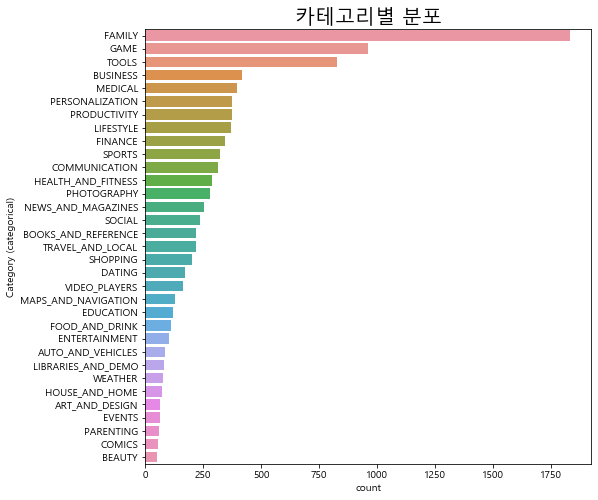

In [25]:
plt.figure(figsize=(8,8))
plt.title('카테고리별 분포', fontsize=20)
sns.countplot(y ='Category (categorical)', data = df, 
              order = df['Category (categorical)'].value_counts().index)
#plt.yticks(fontsize=10)
plt.show()

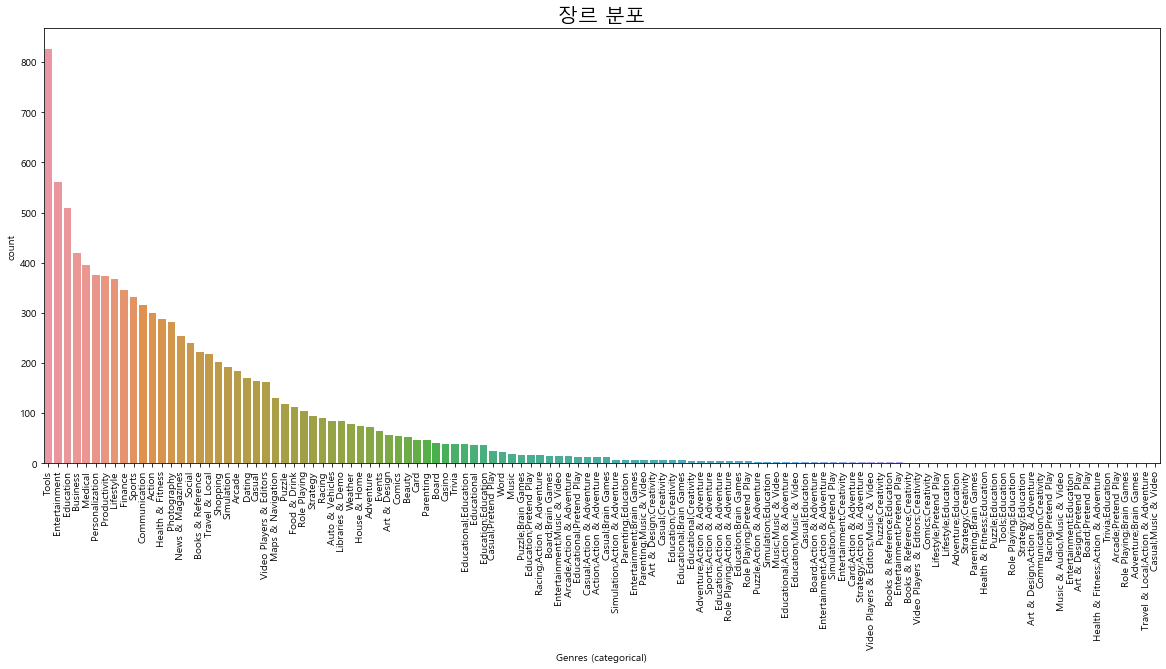

In [26]:
plt.figure(figsize=(20,8))
plt.title('장르 분포', fontsize=20)
sns.countplot(x ='Genres (categorical)', data = df,
             order = df['Genres (categorical)'].value_counts().index)
plt.xticks(fontsize=10,rotation=90)
plt.show()

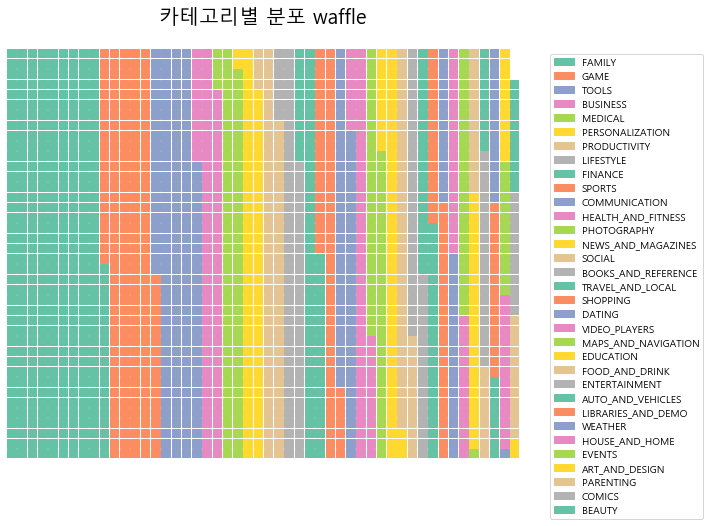

In [30]:
#waffle

CAT_NUM = df['Category (categorical)'].value_counts().sort_index(ascending=True)
CAT_NUM_INDEX=CAT_NUM.index

CAT_NUM_SORTED=CAT_NUM.sort_values(ascending=False)
CAT_NUM_SORTED_INDEX=CAT_NUM.sort_values(ascending=False).index
dic_list_label=list(CAT_NUM_SORTED.index)
dic_list_value=list(CAT_NUM_SORTED)

dictionary = dict(zip(dic_list_label, dic_list_value))
#dictionary = dict(zip(string_list, int_list))


plt.figure(
    figsize=(10,10),
    FigureClass=Waffle,
    rows=40,
    columns=50,
    values=dictionary,
    legend={'loc': 'upper left','bbox_to_anchor': (1.05, 1)})


plt.title('카테고리별 분포 waffle',position=(0.5, 1.05), fontsize=20)
plt.show()

## 2. 2요인 시각화
- catplot

In [53]:
def get_new(x):
    if x < 1000 :
        return '천 미만'
    elif (x >= 1000) & (x < 10000):
        return '천'
    elif (x >= 10000) & (x < 100000):
        return '만'
    elif (x >= 100000) & (x < 1000000):
        return '십만'
    elif (x >= 1000000) & (x < 10000000):
        return '백만'
    else :
        return '천만 이상'
    
order_list = ['천 미만','천','만','십만','백만','천만 이상']

In [54]:
df['다운로드'] = df['Installs'].apply(lambda x : get_new(x))
df['리뷰'] = df['Reviews'].apply(lambda x : get_new(x))

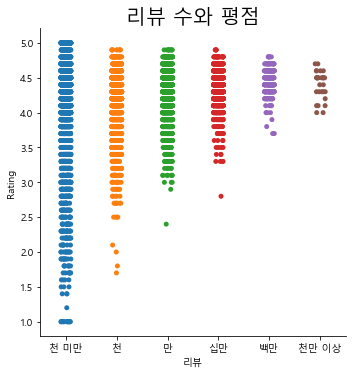

In [60]:
sns.catplot(x = '리뷰', y ='Rating',
            order = order_list,
            data = df)
plt.title('리뷰 수와 평점', fontsize=20)
plt.show()

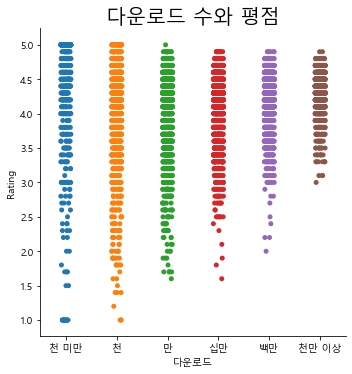

In [57]:
sns.catplot(x = '다운로드', y ='Rating',  
                order=order_list,
                data = df)
plt.title('다운로드 수와 평점', fontsize=20)
plt.show()